In [1]:
#deriving variables from features which represents the features but are not same
#dimentionality redeuction techniques
#it reduces number of features to be stored
#data should exhibit variance.if it has 0 variance that means all data are same so no use.even high variance gives error
#dimensionality reduction is based on variance
#if data has variance then it carries information.
#if variance=0 then it means all are same and no information can be generated

In [2]:
#pca,lda
#principal component analysis
#linear discriminant analysis
#both are preprocessing steps before modelling
#better visualization of dataset can be done by dimentionality reduction (DR)
#reduced features are called principal component and they represent our original data in pca
#pca works even when there is no class label but lda works only in supervised
#pca
#number of components is user defined.
#first component contains more info rest components contains less in reducing order

In [ ]:
#LDA is like PCA but it focuses on maximising separability among known categories 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer,LabelEncoder
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns

In [4]:
df=pd.read_csv("DS2_C6_S5_MallCustomers_Data_Concept.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df["Gender"]=df["Gender"].astype("category")

In [7]:
df["gender"]=LabelEncoder().fit_transform(df["Gender"])

In [8]:
df.drop(["CustomerID","Gender"],axis=1,inplace=True)

In [9]:
scaler=MinMaxScaler()

In [10]:
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [11]:
df

,Age,Annual Income (k$),Spending Score (1-100),gender
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


In [12]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca=PCA(n_components=2)
df_r=pca.fit(df).transform(df)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.57076896, 0.21404941])

In [13]:
#first component carries 57% of information and 2nd component carries 21% of info

In [14]:
#reduced companents (pc1,pc2). they are orthogonal
df_r

array([[ 0.53295542, -0.22784075],
       [ 0.51393907, -0.49307991],
       [-0.44626589,  0.08707859],
       [-0.47879569, -0.36661673],
       [-0.45198432,  0.00300619],
       [-0.47905919, -0.37382159],
       [-0.43069765,  0.29588454],
       [-0.48682386, -0.48573543],
       [ 0.59720084,  0.65030769],
       [-0.46852807, -0.23475757],
       [ 0.59471063,  0.61538677],
       [-0.47701748, -0.35344875],
       [-0.41158991,  0.55348602],
       [-0.47682392, -0.35359718],
       [ 0.56528242,  0.20358955],
       [ 0.51715368, -0.46633419],
       [-0.44449221,  0.09277798],
       [ 0.52189242, -0.40373564],
       [ 0.57308163,  0.30048935],
       [-0.47555073, -0.34740109],
       [ 0.55322264,  0.0212041 ],
       [ 0.52414077, -0.38353428],
       [-0.41744385,  0.45469933],
       [ 0.53041637, -0.3000585 ],
       [-0.41317979,  0.50279592],
       [ 0.52462364, -0.39147651],
       [-0.43124278,  0.25160046],
       [ 0.54117158, -0.16119671],
       [-0.43552899,

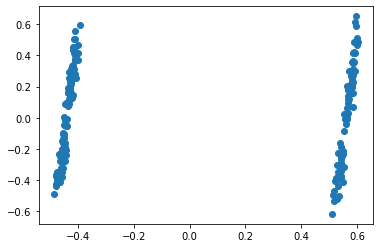

In [15]:
plt.scatter(df_r[:,0],df_r[:,1])

In [16]:
model=KMeans(n_clusters=2).fit(df_r)

Text(0.5, 1.0, 'Kmeans clustering on pca reduced components')

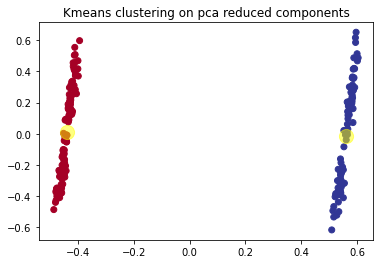

In [17]:
plt.scatter(df_r[:,0],df_r[:,1],c=model.labels_,cmap="RdYlBu")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c="yellow",s=200,alpha=0.5)
plt.title("Kmeans clustering on pca reduced components")

In [19]:
#LDA
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'gender'], dtype='object')

In [21]:
x=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [23]:
y=df["gender"].astype("int")

In [26]:
y.value_counts()

0    112
1     88
Name: gender, dtype: int64

In [27]:
#NUMBER OF COMPONENTS=NO OF CLASSES-1 
lda=LinearDiscriminantAnalysis(n_components=1)
x_r2=lda.fit(x,y).transform(x)

In [28]:
x_r2

array([[ 1.59922551],
       [ 2.28251258],
       [ 0.94459926],
       [ 2.11363335],
       [ 1.13055821],
       [ 2.10867743],
       [ 0.34803452],
       [ 2.37271101],
       [-0.79179216],
       [ 1.69645809],
       [-0.70353433],
       [ 1.99966659],
       [-0.37943907],
       [ 1.98272061],
       [ 0.35372647],
       [ 2.09200281],
       [ 0.79969628],
       [ 1.9075198 ],
       [ 0.0217976 ],
       [ 1.88736908],
       [ 0.72898285],
       [ 1.77975611],
       [-0.23788622],
       [ 1.53641599],
       [-0.43950852],
       [ 1.70107532],
       [ 0.21437782],
       [ 1.10303465],
       [ 0.35593456],
       [ 1.98733784],
       [-0.88654917],
       [ 1.78484189],
       [-0.70086546],
       [ 2.16625876],
       [-0.37422343],
       [ 1.85823196],
       [-0.08735863],
       [ 1.36090385],
       [ 0.22381335],
       [ 1.69249791],
       [-0.69985807],
       [ 1.82863406],
       [-0.08273751],
       [ 0.9902647 ],
       [-0.26346918],
       [ 1

In [36]:
#can use any supervised technique here for lda
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_r2,y)


In [37]:
model

LogisticRegression()

In [44]:
xtest=x_r2.reshape(-1,1)

In [51]:
np.unique(model.predict(xtest),return_counts=True)

(array([0, 1]), array([184,  16], dtype=int64))

In [52]:
y.value_counts()

0    112
1     88
Name: gender, dtype: int64